In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
pip install tensorflow --upgrade

In [54]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


In [55]:
train_annotations = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/train/signs_train_labels.csv'
train_images = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/train'

valid_annotations = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/valid/signs_valid_labels.csv'
valid_images = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/valid'

test_annotations = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/test/signs_test_labels.csv'
test_images = '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/test'


In [56]:
def load_data(csv_file, images_dir):
    data = pd.read_csv(csv_file)
    images = []
    labels = []

    for _, row in tqdm(data.iterrows(), total=len(data)):
        file_name, label = row['filename'], row['class']
        img_path = os.path.join(images_dir, file_name)

        if os.path.exists(img_path):
            # Load the image
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
            img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load train, validation, and test datasets
train_images, train_labels = load_data(train_annotations, '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/train')
valid_images, valid_labels = load_data(valid_annotations, '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/valid')
test_images, test_labels = load_data(test_annotations, '/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/test')

100%|██████████| 133/133 [00:05<00:00, 25.48it/s]


In [57]:
label_encoder = LabelEncoder()

train_labels = to_categorical(label_encoder.fit_transform(train_labels))
valid_labels = to_categorical(label_encoder.transform(valid_labels))
test_labels = to_categorical(label_encoder.transform(test_labels))

In [58]:
# Display all label names
label_names = label_encoder.classes_
print("Label Names:", label_names)


Label Names: ['Bus-stop' 'Children-Crossing-Ahead' 'Compulsory-Roundabout'
 'Cross-Roads-Ahead' 'Double-Bend-to-Left-Ahead'
 'Double-Bend-to-Right-Ahead' 'Falling-Rocks-Ahead' 'Left-Bend-Ahead'
 'Level-crossing-with-barriers-ahead'
 'Level-crossing-without-barriers-ahead' 'Narrow-Bridge-or-Culvert-Ahead'
 'No-entry' 'No-horns' 'No-left-turn' 'No-parking'
 'No-parking-and-standing' 'No-parking-on-even-numbered-days'
 'No-parking-on-odd-numbered-days' 'No-right-turn' 'No-u-turn'
 'Pass-onto-left' 'Pass-onto-right' 'Pedestrian-Crossing'
 'Pedestrian-crossing-Ahead' 'Proceed-straight' 'Right-Bend-Ahead'
 'Road-Bump-Ahead' 'Road-Closed-for-All-Vehicles' 'Roundabout-Ahead'
 'Speed-Limit-40-Kmph' 'Speed-Limit-50-Kmph' 'Speed-Limit-60-Kmph' 'Stop'
 'T-Junction-Ahead' 'Traffic-from-left-merges-ahead'
 'Traffic-from-right-merges-ahead' 'Turn-left' 'Turn-left-ahead'
 'Turn-right' 'Turn-right-ahead' 'hospital']


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    keras.Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_labels.shape[1], activation='softmax')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 41)                  │           5,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,929 (12.63 MB)

 Trainable params: 3,309,929 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(valid_images, valid_labels)
)


Epoch 1/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.0670 - loss: 3.6063 - val_accuracy: 0.2650 - val_loss: 2.9676
Epoch 2/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.2886 - loss: 2.6447 - val_accuracy: 0.6543 - val_loss: 1.6447
Epoch 3/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.4968 - loss: 1.8103 - val_accuracy: 0.8041 - val_loss: 0.9206
Epoch 4/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.6278 - loss: 1.3082 - val_accuracy: 0.8105 - val_loss: 0.6853
Epoch 5/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6829 - loss: 1.0831 - val_accuracy: 0.8515 - val_loss: 0.5290
Epoch 6/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7156 - loss: 0.9486 - val_accuracy: 0.8745 - val_loss: 0.4198
Epoch 7/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.7414 - loss: 0.8214 - val_accuracy: 0.8758 - val_loss: 0.3995
Epoch 8/20
199/199 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.7731 - loss: 0.7319 - val_accu

In [64]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.8989 - loss: 0.2338
Test accuracy: 0.8947368264198303
Test loss: 0.2502613067626953


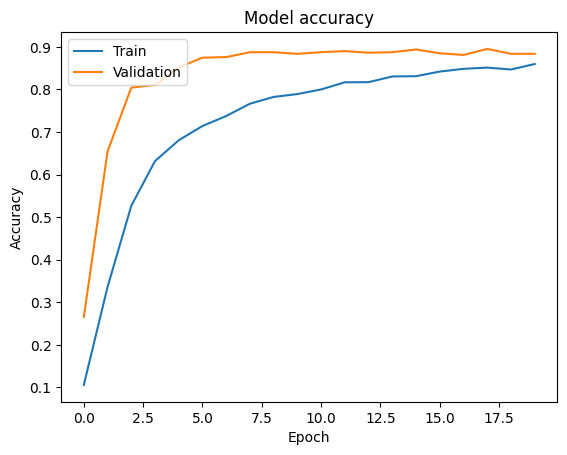

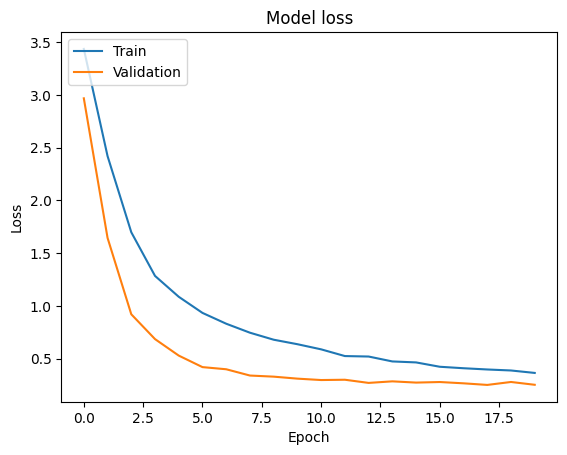

In [65]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step


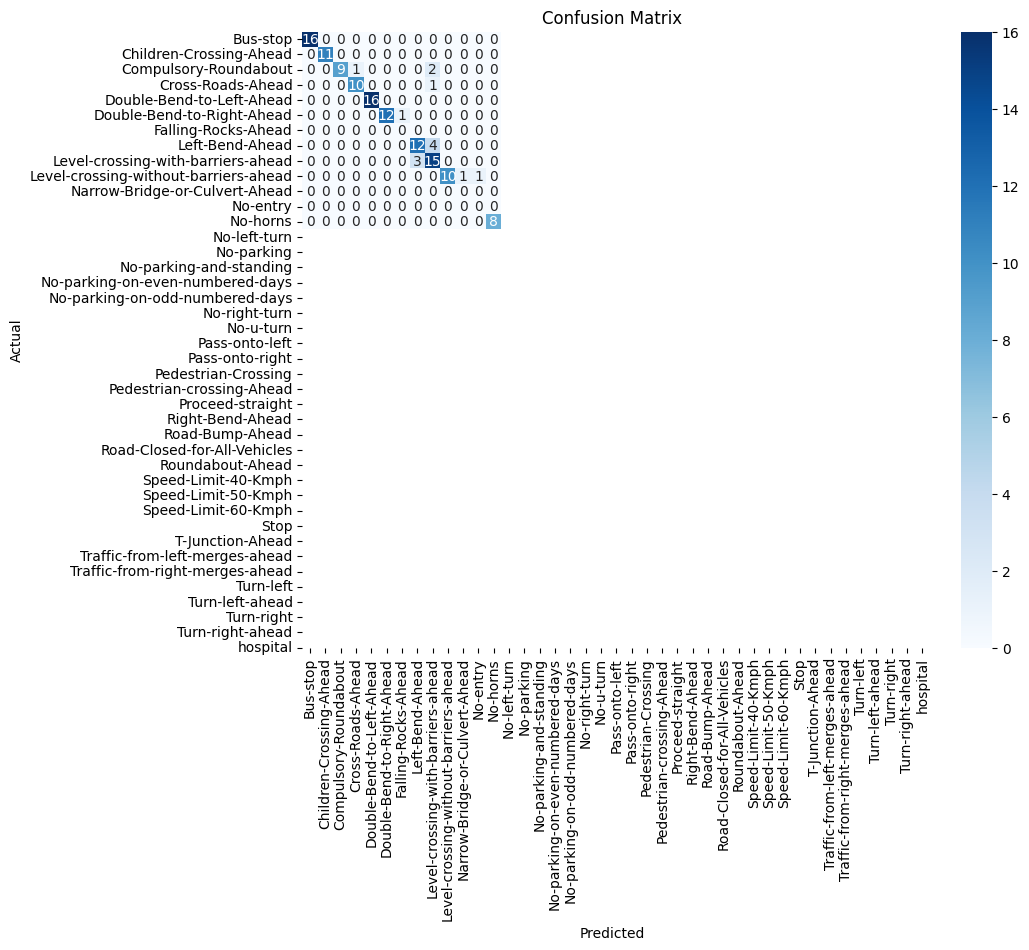

Unique classes in predictions: [ 1  6  8 12 13 16 17 18 19 29 30 31 40]
Unique classes in true labels: [ 1  6  8 12 13 16 18 19 29 40]
                                    precision    recall  f1-score   support

           Children-Crossing-Ahead       1.00      1.00      1.00        16
               Falling-Rocks-Ahead       1.00      1.00      1.00        11
Level-crossing-with-barriers-ahead       1.00      0.75      0.86        12
                          No-horns       0.91      0.91      0.91        11
                      No-left-turn       1.00      1.00      1.00        16
  No-parking-on-even-numbered-days       1.00      0.92      0.96        13
                     No-right-turn       0.80      0.75      0.77        16
                         No-u-turn       0.68      0.83      0.75        18
               Speed-Limit-40-Kmph       1.00      0.83      0.91        12
                          hospital       1.00      1.00      1.00         8

                         mi

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Check unique classes in predictions and true labels
unique_pred_classes = np.unique(y_pred_classes)
unique_true_classes = np.unique(y_true)

print("Unique classes in predictions:", unique_pred_classes)
print("Unique classes in true labels:", unique_true_classes)

# Create a mask for the classes that are present in the true labels
valid_classes = unique_true_classes  # Use the true labels directly

# Print classification report for only the valid classes
# Use the labels parameter to specify the classes to include in the report
print(classification_report(y_true, y_pred_classes, labels=valid_classes, target_names=label_encoder.classes_[valid_classes]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step


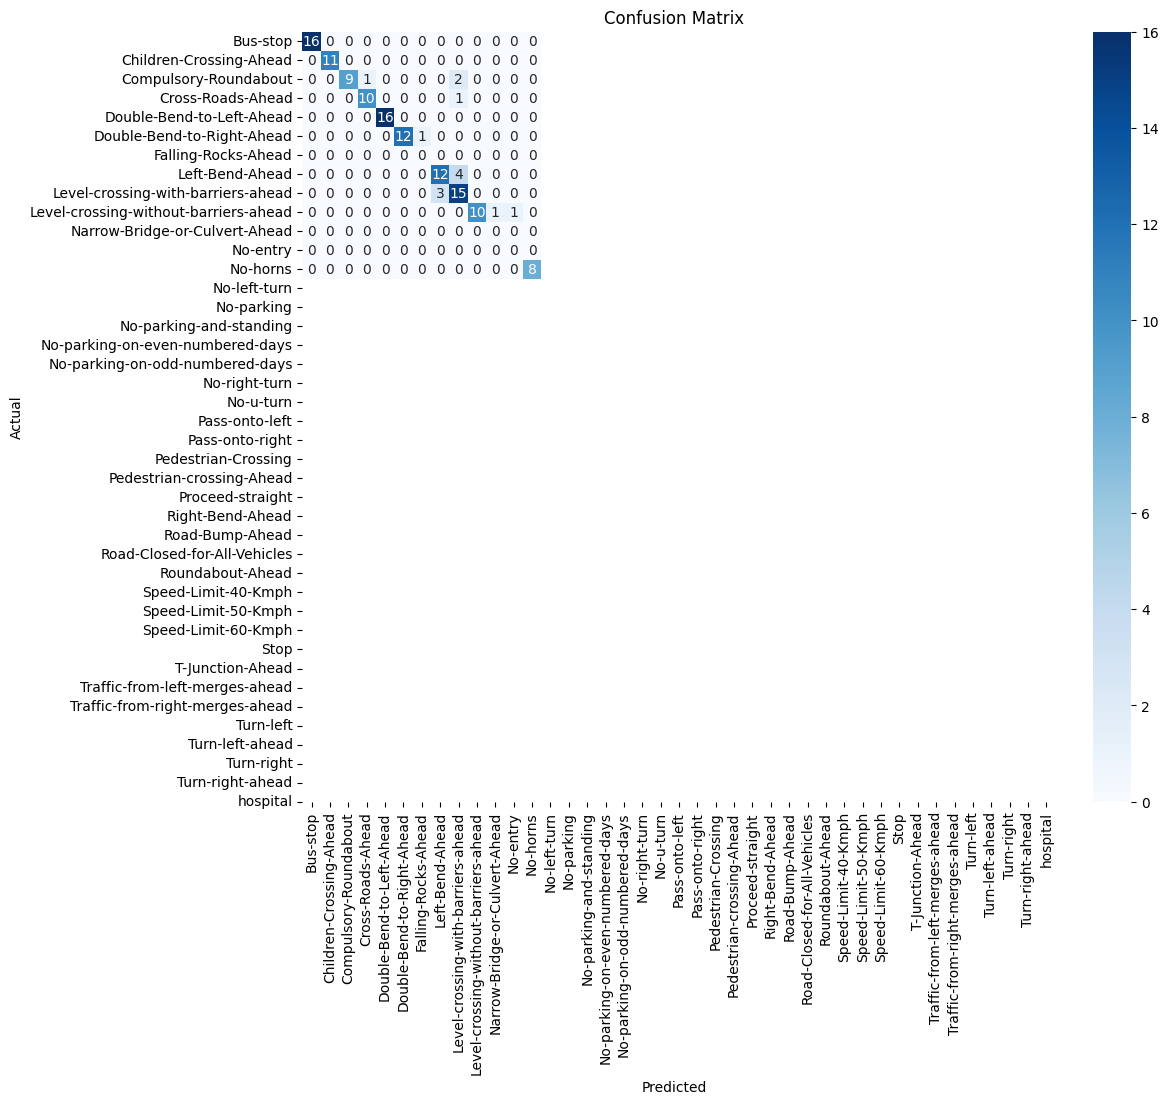

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Get predictions on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes
y_true = np.argmax(test_labels, axis=1)      # True classes

# Step 2: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

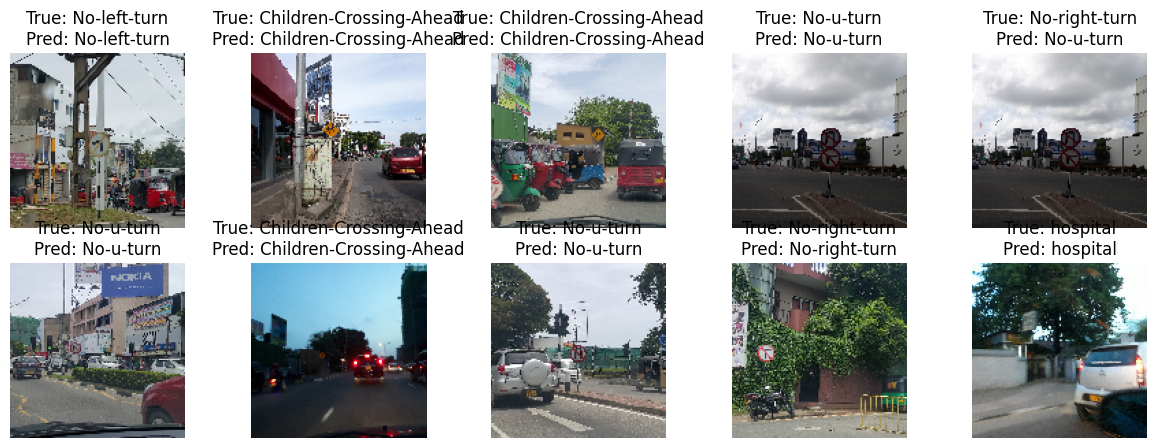

In [67]:
def plot_predictions(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

# Visualize some predictions
plot_predictions(test_images, y_true, y_pred_classes, label_encoder.classes_)

In [63]:
model.save('/content/drive/MyDrive/Road Traffic Sign In Sri Lanka/Re_New_traffic_sign_model.keras')


In [ ]:
print("Unique Labels in Test Set:", np.unique(test_labels))
print("Test Labels Shape (before encoding):", test_labels.shape)


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy:.2f}')
print(f'Test loss: {test_loss:.2f}')

In [ ]:
# Check the number of unique classes in the training and test labels
num_classes_train = train_labels.shape[1]  # Number of classes in training data
num_classes_test = test_labels.shape[1]     # Number of classes in test data

print(f'Number of classes in training data: {num_classes_train}')
print(f'Number of classes in test data: {num_classes_test}')

In [ ]:

# Check the classes learned by the label encoder
print("Classes in label encoder:", label_encoder.classes_)

In [ ]:
# Get predictions
y_pred = model.predict(test_images)  # Use test_images instead of X_test
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Convert one-hot encoded test labels back to class labels
y_test_classes = np.argmax(test_labels, axis=1)  # Use test_labels instead of y_test_one_hot

# Generate classification report
# Use the unique classes from the predictions and true labels
unique_classes = np.unique(np.concatenate((y_test_classes, y_pred_classes)))

report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_, labels=unique_classes)
print(report)


In [ ]:
from sklearn.metrics import classification_report

# Get unique classes from the test labels
unique_classes = np.unique(np.concatenate((y_test_classes, y_pred_classes)))

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes,
                              target_names=label_encoder.classes_,
                              labels=unique_classes,
                              zero_division=1)  # Adjust zero_division as needed
print(report)

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Upload the test image
uploaded = files.upload()

# Assuming only one image is uploaded
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = load_img(image_path, target_size=(128, 128))  # Resize to 128x128
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize to [0, 1]
image_input = np.expand_dims(image_array, axis=0)  # Reshape for prediction

# Check the shape of the image input
print("Image Input Shape:", image_input.shape)

# Make predictions
predictions = model.predict(image_input)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the label name (Ensure your label encoder is loaded properly)
predicted_label = label_encoder.classes_[predicted_class_index]

# Display the result
print(f"Predicted Label: {predicted_label}")